<a href="https://colab.research.google.com/github/Tamilarasit/Mycodes/blob/main/3_LeNet_TL_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import the modules and packages**

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models


from sklearn.metrics import confusion_matrix , classification_report

# Load the dataset

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.mnist.load_data()  # Dataset contains images and labels

In [5]:
X_train[1].shape

(28, 28)

In [6]:
y_train = y_train.reshape(-1,)  # reshape 2D to 1D
y_test = y_test.reshape(-1,)
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Plot an image

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel([y[index]])

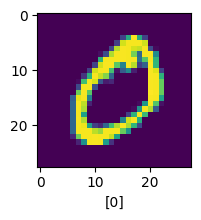

In [8]:
plot_sample(X_train, y_train, 1)

Normalizing the training data

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# **Build simple artificial neural network for image classification**
1.Creating a model

In [10]:
LENET = models.Sequential([
    layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
LENET.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                1

2. Compiling a model
   --- completely ready to use

In [12]:
LENET.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

3.Train the model

In [13]:
history=LENET.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.5100 - accuracy: 0.8459 - val_loss: 0.1749 - val_accuracy: 0.9484
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1487 - accuracy: 0.9540 - val_loss: 0.1170 - val_accuracy: 0.9654
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1057 - accuracy: 0.9677 - val_loss: 0.0855 - val_accuracy: 0.9718
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0866 - accuracy: 0.9733 - val_loss: 0.0734 - val_accuracy: 0.9781
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0739 - accuracy: 0.9772 - val_loss: 0.0641 - val_accuracy: 0.9805
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0664 - accuracy: 0.9795 - val_loss: 0.0760 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0601 - accuracy: 0.9814 - val_loss: 0.0536 -

# **Testing the performance of the model**
1. Evaluate the model

In [14]:
LENET.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0438 - accuracy: 0.9859


[0.043797899037599564, 0.9858999848365784]

2.Predictability of the unknown data

In [15]:
y_pred = LENET.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



3.Pictorial representation of the model's performance

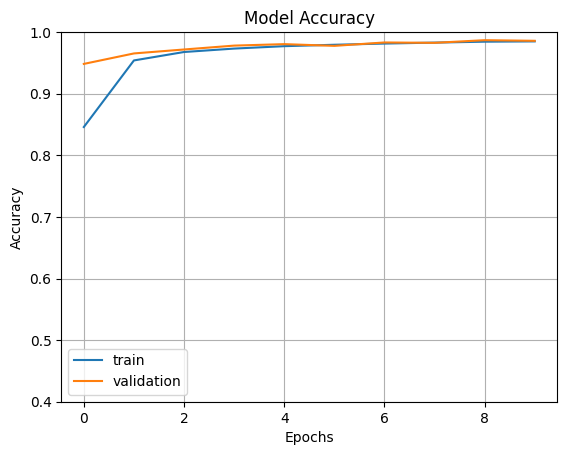

In [16]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Confusion Matrix
1.Compute the confusion matrix

In [17]:
con_mat=confusion_matrix(y_test,y_pred_classes)

2.Plot the confusion matrix

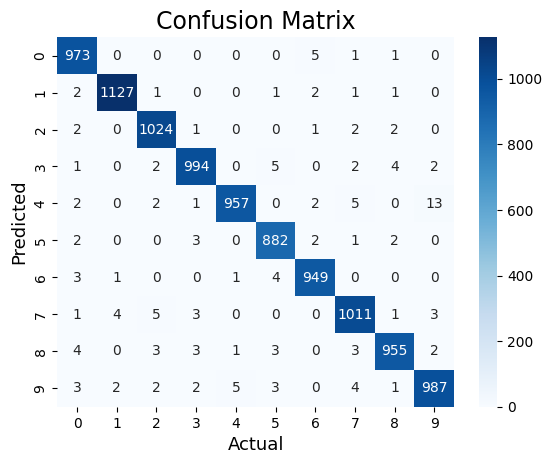

In [20]:
import seaborn as sns
sns.heatmap(con_mat,annot=True,fmt='g', cmap='Blues')#,xticklabels=y_train,yticklabels=y_train)
plt.ylabel('Predicted',fontsize=13)
plt.xlabel('Actual',fontsize=13)

plt.title('Confusion Matrix',fontsize=17)
plt.show()